In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sys
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker

In [145]:
polymer="PhPTZ"
solution="EC_DMC_LiPF6"
percent="0_Percent"
temp="300K"


name=f"{polymer}-{solution}"
print(name)
data_path=f"/Volumes/project/depablo/mleyf3/DMREF/{name}/{percent}_0_SoC"

if polymer == "PVMPT":
    data_path=f"/Volumes/project/depablo/mleyf3/DMREF/PVMPT_Simulations/{name}/{percent}_0_SoC"

if percent == "0_Percent":
    data_path=f"/Volumes/project/depablo/mleyf3/DMREF/{polymer}/{polymer}_n30"

print(data_path)


PhPTZ-EC_DMC_LiPF6
/Volumes/project/depablo/mleyf3/DMREF/PhPTZ/PhPTZ_n30


0_Percent PhPTZ EC_DMC_LiPF6 - 300K
------------------
Combined average density (last 40 ns) = 1151.91888
Error bar (std dev) = 0.58037


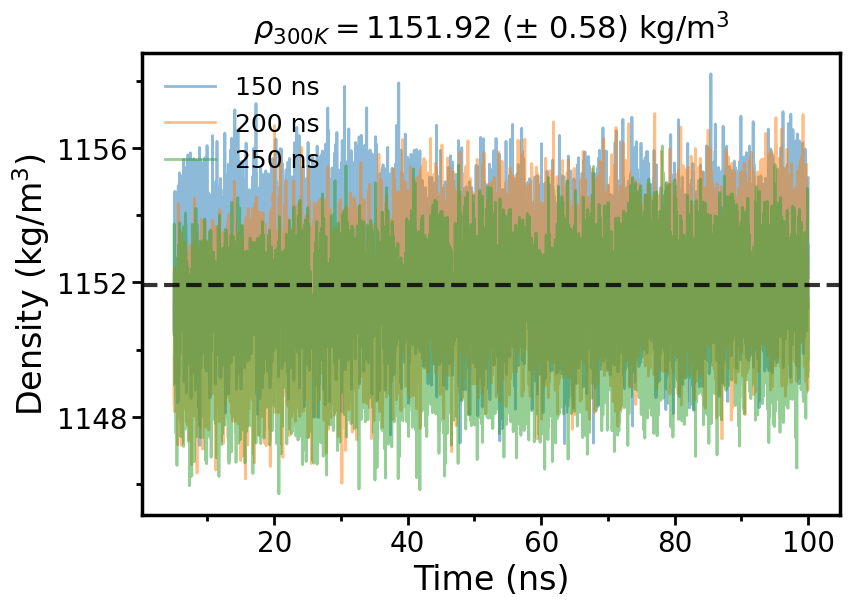

In [146]:
timing=[150, 200, 250]

averages = []

fig, ax = plt.subplots(figsize=(9, 6))

for t in timing:
    density = np.genfromtxt(
        [i for i in open(f'{data_path}/cool/cool_from_{t}ns/density_equilibration_{temp}_from_{t}ns.xvg').read().splitlines() if not i.startswith(('#', '@'))]
    )[502:]
    time = density.T[0]

    last_40ns_mask = time >= (time[-1] - 40000)
    last_40ns_density = density[last_40ns_mask, 1]

    avg_density = np.mean(last_40ns_density)
    averages.append(avg_density)

    # Optional: plot each trajectory
    ax.plot(density.T[0] / 1000, density.T[1],
            label=f"{t} ns",
            alpha=0.5, lw=2)

# Calculate combined average and error bar (std dev of the three averages)
combined_avg = np.mean(averages)
combined_std = np.std(averages)

ax.axhline(combined_avg, 
           #label = f"{combined_avg:0.2f} kg/m$^3$", 
           c="k", ls="--", lw=3, alpha = 0.8)

ax.set_xlabel("Time (ns)", fontsize=24)
ax.set_ylabel("Density (kg/m$^3$)", fontsize=24)
#ax.set_ylim(1030, 1060)
ax.set_title(r"$\rho_{300 K} = $"+f"{combined_avg:0.2f} (± {combined_std:0.2f}) kg/m$^3$",
             pad=10,
             fontsize=22)

ax.legend(fontsize=18, 
          #bbox_to_anchor=(1, 0.5),
          frameon=False)

for spine in ax.spines.values():
    spine.set_linewidth(2.5)

ax.yaxis.set_major_locator(ticker.MultipleLocator(4))
ax.yaxis.set_minor_locator(MultipleLocator(2))

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_minor_locator(MultipleLocator(10))

ax.tick_params(axis='both', width=2.0, length=7, labelsize=20)
ax.tick_params(axis='both', which='minor', width=2.0, length=4)

plt.savefig(f'/Users/mleyf/Documents/DMREF/Backbone study/Figures/{polymer}/density_{percent}_{temp}.png', bbox_inches='tight', dpi=300)
print(f"{percent} {polymer} {solution} - {temp}")
print("------------------")
print(f"Combined average density (last 40 ns) = {combined_avg:.5f}")
print(f"Error bar (std dev) = {combined_std:.5f}")


In [148]:
    #   'comp(%)',  'Polymer', temp (K), 'density_avg', 'density_err','Rg_avg','Rg_err',    'poly_diff_avg',    'poly_diff_err',    'Li_diff_avg',   'Li_diff_err',     'PF6_diff_avg',      'PF6_diff_err'
data = [[        0,   'PhPTZ',      300,       1151.92,         0.58,     3.60,    0.02,           1.15,           0.16,       np.nan,      np.nan,         np.nan,       np.nan,],
        [        5,   'PhPTZ',      300,       1165.60,         0.81,     3.60,    0.06,           8.39E-11,          1.330E-11,         4.02E-10,       0.904E-10,           2.35E-10,        0.901E-10,],
        [       10,   'PhPTZ',      300,       1174.47,         1.07,     3.58,    0.10,           1.38E-10,          0.372E-10,         7.16E-10,       0.634E-10,           5.54E-10,        1.780E-10,],
        [       20,   'PhPTZ',      300,       1185.27,         0.42,     3.60,    0.04,           1.38E-10,          0.246E-10,         6.94E-10,       0.610E-10,           5.70E-10,        1.340E-10,],
        [        0,   'PVMPT',      300,       1183.80,         1.34,   np.nan,  np.nan,         np.nan,         np.nan,       np.nan,      np.nan,         np.nan,       np.nan,],
        [        5,   'PVMPT',      300,       1195.30,         0.71,     3.59,    0.08,           2.56E-10,          0.453E-10,         2.37E-10,       0.512E-10,           2.08E-10,        0.274E-10,],
        [       10,   'PVMPT',      300,       1201.30,         0.70,     3.60,    0.05,           1.57E-10,          0.423E-10,         1.72E-10,       0.604E-10,           1.81E-10,        0.483E-10,],
        [       20,   'PVMPT',      300,       1210.65,         0.54,     3.57,    0.01,           2.23E-10,          0.691E-10,         2.27E-10,       0.676E-10,           3.10E-10,        0.968E-10,],
        [        0,   'PTZMA',      300,       1202.25,         0.60,   np.nan,  np.nan,         np.nan,         np.nan,       np.nan,      np.nan,         np.nan,       np.nan,],
        [        5,   'PTZMA',      300,       1207.83,         0.98,   np.nan,  np.nan,         np.nan,         np.nan,       np.nan,      np.nan,         np.nan,       np.nan,],
        [       10,   'PTZMA',      300,       1211.60,         0.53,   np.nan,  np.nan,         np.nan,         np.nan,       np.nan,      np.nan,         np.nan,       np.nan,],
        [       20,   'PTZMA',      300,       1215.93,         1.09,   np.nan,  np.nan,         np.nan,         np.nan,       np.nan,      np.nan,         np.nan,       np.nan,],
        [        0,   'PVBPT',      300,       1143.89,         1.00,   np.nan,  np.nan,         np.nan,         np.nan,       np.nan,      np.nan,         np.nan,       np.nan,],
        [        5,   'PVBPT',      300,       1156.21,         1.35,   np.nan,  np.nan,         np.nan,         np.nan,       np.nan,      np.nan,         np.nan,       np.nan,],
        [       10,   'PVBPT',      300,       1165.57,         1.39,   np.nan,  np.nan,         np.nan,         np.nan,       np.nan,      np.nan,         np.nan,       np.nan,],
        [       20,   'PVBPT',      300,       1177.59,         0.98,   np.nan,  np.nan,         np.nan,         np.nan,       np.nan,      np.nan,         np.nan,       np.nan,],
        [        0,   'PVPPP',      300,       1128.90,         1.38,   np.nan,  np.nan,         np.nan,         np.nan,       np.nan,      np.nan,         np.nan,       np.nan,],
        [        5,   'PVPPP',      300,       1137.30,         1.12,   np.nan,  np.nan,         np.nan,         np.nan,       np.nan,      np.nan,         np.nan,       np.nan,],
        [       10,   'PVPPP',      300,       1144.11,         0.49,   np.nan,  np.nan,         np.nan,         np.nan,       np.nan,      np.nan,         np.nan,       np.nan,],
        [       20,   'PVPPP',      300,       1151.97,       np.nan,   np.nan,  np.nan,         np.nan,         np.nan,       np.nan,      np.nan,         np.nan,       np.nan,],]

df = pd.DataFrame(data, columns=[ 'comp(%)',  'Polymer', 'temp (K)', 'density_avg', 'density_err','Rg_avg','Rg_err','poly_diff_avg','poly_diff_err','Li_diff_avg','Li_diff_err','PF6_diff_avg','PF6_diff_err'])
df

,comp(%),Polymer,temp (K),density_avg,density_err,Rg_avg,Rg_err,poly_diff_avg,poly_diff_err,Li_diff_avg,Li_diff_err,PF6_diff_avg,PF6_diff_err
0,0,PhPTZ,300,1151.92,0.58,3.60,0.02,1.150000e+00,1.600000e-01,NaN,NaN,NaN,NaN
1,5,PhPTZ,300,1165.60,0.81,3.60,0.06,8.390000e-11,1.330000e-11,4.020000e-10,9.040000e-11,2.350000e-10,9.010000e-11
2,10,PhPTZ,300,1174.47,1.07,3.58,0.10,1.380000e-10,3.720000e-11,7.160000e-10,6.340000e-11,5.540000e-10,1.780000e-10
3,20,PhPTZ,300,1185.27,0.42,3.60,0.04,1.380000e-10,2.460000e-11,6.940000e-10,6.100000e-11,5.700000e-10,1.340000e-10
4,0,PVMPT,300,1183.80,1.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,PVMPT,300,1195.30,0.71,3.59,0.08,2.560000e-10,4.530000e-11,2.370000e-10,5.120000e-11,2.080000e-10,2.740000e-11
6,10,PVMPT,300,1201.30,0.70,3.60,0.05,1.570000e-10,4.230000e-11,1.720000e-10,6.040000e-11,1.810000e-10,4.830000e-11
7,20,PVMPT,300,1210.65,0.54,3.57,0.01,2.230000e-10,6.910000e-11,2.270000e-10,6.760000e-11,3.100000e-10,9.680000e-11
8,0,PTZMA,300,1202.25,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5,PTZMA,300,1207.83,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


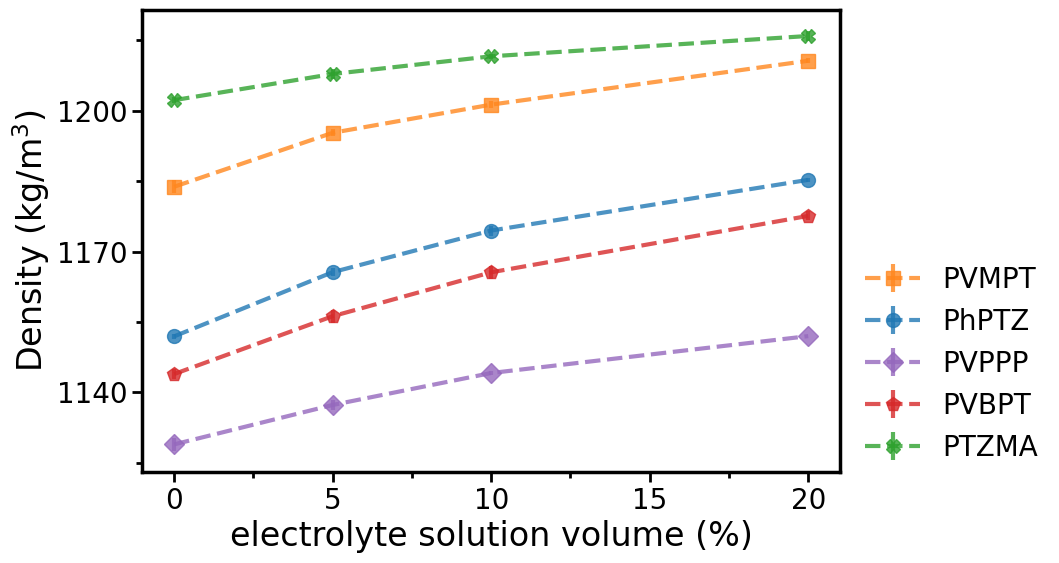

In [149]:
temp = "300K"

fig, ax = plt.subplots(figsize=(9, 6))

orange = '#FF871E'
blue = '#2178B4'
green = '#2EA12E'
purple = '#9568BD'
red = '#D6292A'

PhPTZ = df[df["Polymer"]=="PhPTZ"]
PVMPT = df[df["Polymer"]=="PVMPT"]
PTZMA = df[df["Polymer"]=="PTZMA"]
PVBPT = df[df["Polymer"]=="PVBPT"]
PVPPP = df[df["Polymer"]=="PVPPP"]

ax.errorbar(PVMPT["comp(%)"], PVMPT["density_avg"], PVMPT["density_err"], label="PVMPT",
             marker="s", alpha=0.8, lw=3, ms=10,ls="--", color=orange)
ax.errorbar(PhPTZ["comp(%)"], PhPTZ["density_avg"], PhPTZ["density_err"], label="PhPTZ",
             marker="o", alpha=0.8, lw=3, ms=10,ls="--", color=blue)
ax.errorbar(PVPPP["comp(%)"], PVPPP["density_avg"], PVPPP["density_err"], label="PVPPP",
             marker="D", alpha=0.8, lw=3, ms=10,ls="--", color=purple)
ax.errorbar(PVBPT["comp(%)"], PVBPT["density_avg"], PVBPT["density_err"], label="PVBPT",
             marker="p", alpha=0.8, lw=3, ms=10,ls="--", color=red)
ax.errorbar(PTZMA["comp(%)"], PTZMA["density_avg"], PTZMA["density_err"], label="PTZMA",
             marker="X", alpha=0.8, lw=3, ms=10,ls="--", color=green)

ax.set_xlabel("electrolyte solution volume (%)", fontsize=24)
ax.set_ylabel(r"Density (kg/m$^3$)", fontsize=24)
#ax.set_title("300K", fontsize=22, pad=10)

plt.legend(fontsize=20, bbox_to_anchor=(1, 0.5), frameon=False)


for spine in ax.spines.values():
    spine.set_linewidth(2.5)  # Makes the border thicker

ax.yaxis.set_major_locator(ticker.MultipleLocator(30))
ax.yaxis.set_minor_locator(MultipleLocator(15))  # Minor ticks every 10 units

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(2.5))  # Minor ticks every 5 units

ax.tick_params(axis='both', width=2.0, length=7, labelsize=20)
ax.tick_params(axis='both', which='minor', width=2.0, length=4)

plt.savefig(f'/Users/mleyf/Documents/DMREF/Backbone study/Figures/density_summary_{temp}.png', bbox_inches='tight', dpi=300)
